In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, binom, poisson
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("=" * 60)
print("RELATÓRIO: ESTATÍSTICA E PROBABILIDADE COM PYTHON")
print("=" * 60)

RELATÓRIO: ESTATÍSTICA E PROBABILIDADE COM PYTHON


In [4]:
## 1. Tipos de Dados (Numéricos, Categóricos, Ordinais)

print("\n1. TIPOS DE DADOS")
print("-" * 40)



1. TIPOS DE DADOS
----------------------------------------


In [5]:
# Criando um dataset exemplo para demonstrar os tipos de dados
np.random.seed(42)  # Para reproduzir os mesmos resultados

In [6]:
# Dados numéricos contínuos
idades = np.random.normal(30, 8, 100).astype(int)  # Idade média 30, desvio 8
salarios = np.random.exponential(5000, 100)  # Salários com distribuição exponencial

In [7]:
# Dados numéricos discretos
num_filhos = np.random.poisson(1.5, 100)  # Número de filhos (Poisson)
anos_experiencia = np.random.randint(0, 20, 100)  # Anos de experiência

In [8]:
# Dados categóricos nominais
generos = np.random.choice(['Masculino', 'Feminino', 'Não-binário'], 100, p=[0.45, 0.45, 0.1])
areas = np.random.choice(['TI', 'Saúde', 'Educação', 'Engenharia'], 100, p=[0.3, 0.25, 0.25, 0.2])

In [9]:
# Dados categóricos ordinais
escolaridade = np.random.choice(['Fundamental', 'Médio', 'Superior', 'Pós-graduação'], 
                               100, p=[0.15, 0.35, 0.35, 0.15])
satisfacao = np.random.choice(['Muito Insatisfeito', 'Insatisfeito', 'Neutro', 'Satisfeito', 'Muito Satisfeito'], 
                             100, p=[0.1, 0.15, 0.2, 0.35, 0.2])

In [11]:
# Criando DataFrame
df = pd.DataFrame({
    'idade': idades,
    'salario': salarios,
    'num_filhos': num_filhos,
    'anos_experiencia': anos_experiencia,
    'genero': generos,
    'area': areas,
    'escolaridade': escolaridade,
    'satisfacao': satisfacao
})

print("TIPOS DE DADOS NO DATASET:")
print(f"• Numéricos contínuos: idade, salário")
print(f"• Numéricos discretos: num_filhos, anos_experiência")
print(f"• Categóricos nominais: gênero, área")
print(f"• Categóricos ordinais: escolaridade, satisfação")

print(f"\nTipos de dados detectados pelo pandas:")
print(df.dtypes)

print(f"\nPrimeiras 5 linhas do dataset:")
print(df.head())

print(f"\nInformações gerais do dataset:")
print(df.info())

TIPOS DE DADOS NO DATASET:
• Numéricos contínuos: idade, salário
• Numéricos discretos: num_filhos, anos_experiência
• Categóricos nominais: gênero, área
• Categóricos ordinais: escolaridade, satisfação

Tipos de dados detectados pelo pandas:
idade                 int64
salario             float64
num_filhos            int64
anos_experiencia      int64
genero               object
area                 object
escolaridade         object
satisfacao           object
dtype: object

Primeiras 5 linhas do dataset:
   idade       salario  num_filhos  anos_experiencia       genero        area  \
0     33   2701.366605           3                17     Feminino  Engenharia   
1     28   1255.836691           0                 4    Masculino  Engenharia   
2     35    638.401958           1                 8     Feminino  Engenharia   
3     42   2059.542899           0                 3  Não-binário          TI   
4     28  14315.605613           1                16     Feminino          TI   



In [12]:
## 2. Medidas de Tendência Central (Média, Mediana, Moda)

print("\n\n2. MEDIDAS DE TENDÊNCIA CENTRAL")
print("-" * 40)




2. MEDIDAS DE TENDÊNCIA CENTRAL
----------------------------------------


In [13]:
# Usando a coluna salário para demonstrar as medidas
salarios_exemplo = df['salario']

In [14]:
# Calculando as medidas
media = np.mean(salarios_exemplo)
mediana = np.median(salarios_exemplo)

In [17]:
# Para moda em dados contínuos, vamos usar intervalos
moda_stats = stats.mode(np.round(salarios_exemplo, -2))  # Arredonda para centenas

print("MEDIDAS PARA SALÁRIOS:")
print(f"Média: R$ {media:.2f}")
print(f"Mediana: R$ {mediana:.2f}")
print(f"Moda (aproximada): R$ {moda_stats.mode:.2f}")

MEDIDAS PARA SALÁRIOS:
Média: R$ 4699.91
Mediana: R$ 3540.38
Moda (aproximada): R$ 1400.00


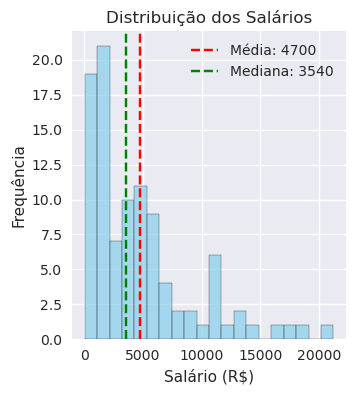

In [18]:
# Comparação visual
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.hist(salarios_exemplo, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(media, color='red', linestyle='--', label=f'Média: {media:.0f}')
plt.axvline(mediana, color='green', linestyle='--', label=f'Mediana: {mediana:.0f}')
plt.title('Distribuição dos Salários')
plt.xlabel('Salário (R$)')
plt.ylabel('Frequência')
plt.legend()

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Satisfeito'),
  Text(1, 0, 'Neutro'),
  Text(2, 0, 'Insatisfeito'),
  Text(3, 0, 'Muito Satisfeito'),
  Text(4, 0, 'Muito Insatisfeito')])

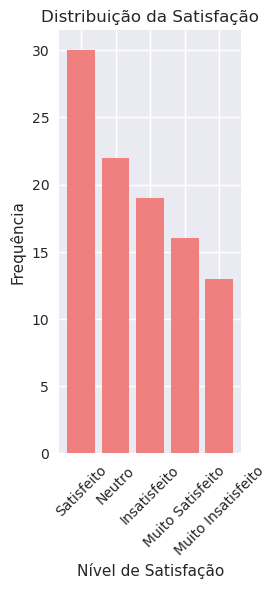

In [19]:
# Para dados categóricos ordinais - satisfação
plt.subplot(1, 3, 2)
satisfacao_counts = df['satisfacao'].value_counts()
plt.bar(satisfacao_counts.index, satisfacao_counts.values, color='lightcoral')
plt.title('Distribuição da Satisfação')
plt.xlabel('Nível de Satisfação')
plt.ylabel('Frequência')
plt.xticks(rotation=45)

In [20]:
# Moda para dados categóricos
moda_satisfacao = df['satisfacao'].mode()[0]
print(f"\nModa da satisfação: {moda_satisfacao}")


Moda da satisfação: Satisfeito


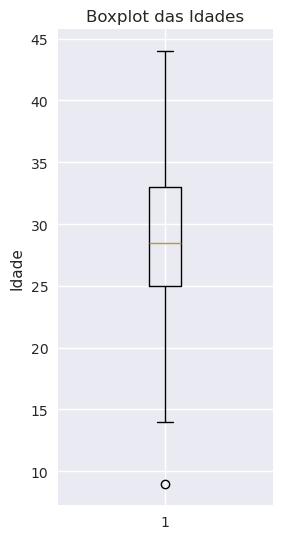

In [21]:
# Boxplot para visualizar quartis
plt.subplot(1, 3, 3)
plt.boxplot(df['idade'], vert=True)
plt.title('Boxplot das Idades')
plt.ylabel('Idade')

plt.tight_layout()
plt.show()

In [22]:
# Medidas para diferentes tipos de dados
print(f"\nRESUMO ESTATÍSTICO PARA DADOS NUMÉRICOS:")
print(df[['idade', 'salario', 'num_filhos', 'anos_experiencia']].describe())


RESUMO ESTATÍSTICO PARA DADOS NUMÉRICOS:
            idade       salario  num_filhos  anos_experiencia
count  100.000000    100.000000  100.000000        100.000000
mean    28.660000   4699.907123    1.660000          9.020000
std      7.224006   4528.001363    1.394216          6.261926
min      9.000000     25.372185    0.000000          0.000000
25%     25.000000   1380.614611    1.000000          4.000000
50%     28.500000   3540.375543    1.000000          9.000000
75%     33.000000   5932.541046    2.250000         15.000000
max     44.000000  21220.184913    5.000000         19.000000


In [23]:
## 3. Atividade: Usando Média, Mediana e Moda em Python

print("\n\n3. ATIVIDADE PRÁTICA: MEDIDAS DE TENDÊNCIA CENTRAL")
print("-" * 40)



3. ATIVIDADE PRÁTICA: MEDIDAS DE TENDÊNCIA CENTRAL
----------------------------------------


In [26]:
# Criando um cenário prático: notas de uma turma
np.random.seed(123)
notas_turma_a = np.random.normal(7.5, 1.5, 30)  # Turma A: média 7.5
notas_turma_b = np.concatenate([
    np.random.normal(6.0, 1.0, 20),  # Maioria com média 6.0
    np.random.normal(9.5, 0.5, 10)   # Alguns com média 9.5 (bimodal)
])

In [27]:
# Garantindo que as notas estejam entre 0 e 10
notas_turma_a = np.clip(notas_turma_a, 0, 10)
notas_turma_b = np.clip(notas_turma_b, 0, 10)

def analisar_notas(notas, nome_turma):
    """Função para analisar as notas de uma turma"""
    print(f"\n--- ANÁLISE DA {nome_turma} ---")
    
    media = np.mean(notas)
    mediana = np.median(notas)
    
    # Para moda, vamos arredondar as notas para 1 casa decimal
    notas_arredondadas = np.round(notas, 1)
    moda_resultado = stats.mode(notas_arredondadas, keepdims=True)
    moda = moda_resultado.mode[0]
    freq_moda = moda_resultado.count[0]
    
    print(f"Média: {media:.2f}")
    print(f"Mediana: {mediana:.2f}")
    print(f"Moda: {moda:.1f} (aparece {freq_moda} vezes)")
    
    # Análise da distribuição
    if abs(media - mediana) < 0.2:
        print("Distribuição: Aproximadamente simétrica")
    elif media > mediana:
        print("Distribuição: Assimétrica à direita (cauda longa à direita)")
    else:
        print("Distribuição: Assimétrica à esquerda (cauda longa à esquerda)")
    
    return media, mediana, moda


In [28]:
# Analisando as turmas
media_a, mediana_a, moda_a = analisar_notas(notas_turma_a, "TURMA A")
media_b, mediana_b, moda_b = analisar_notas(notas_turma_b, "TURMA B")


--- ANÁLISE DA TURMA A ---
Média: 7.51
Mediana: 7.07
Moda: 6.5 (aparece 3 vezes)
Distribuição: Assimétrica à direita (cauda longa à direita)

--- ANÁLISE DA TURMA B ---
Média: 7.19
Mediana: 6.63
Moda: 10.0 (aparece 5 vezes)
Distribuição: Assimétrica à direita (cauda longa à direita)


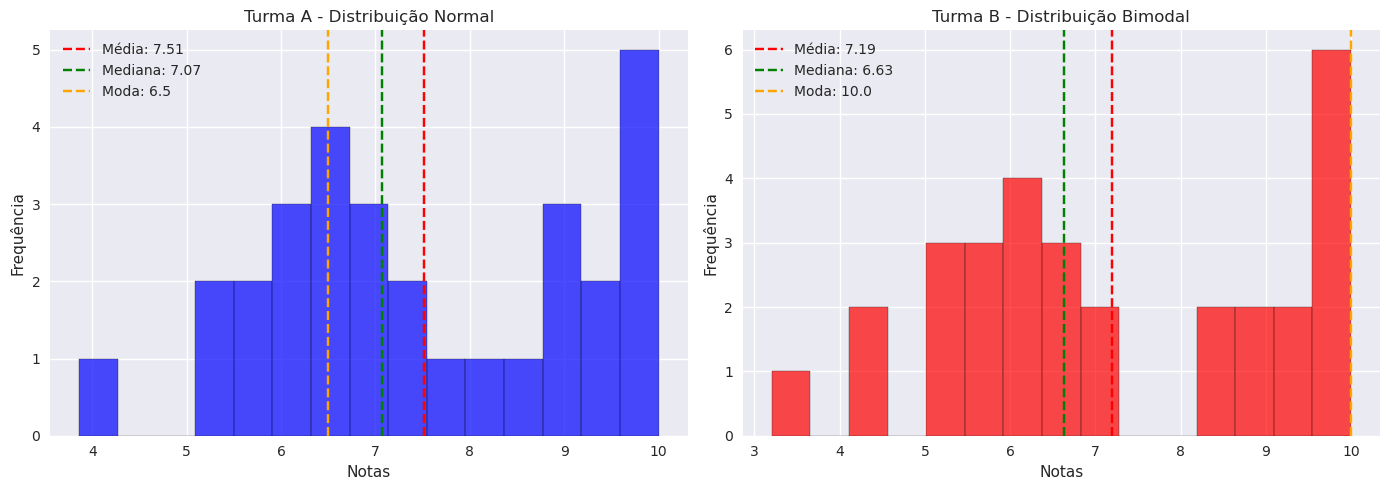

In [29]:
# Visualização comparativa
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.hist(notas_turma_a, bins=15, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(media_a, color='red', linestyle='--', label=f'Média: {media_a:.2f}')
plt.axvline(mediana_a, color='green', linestyle='--', label=f'Mediana: {mediana_a:.2f}')
plt.axvline(moda_a, color='orange', linestyle='--', label=f'Moda: {moda_a:.1f}')
plt.title('Turma A - Distribuição Normal')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(notas_turma_b, bins=15, alpha=0.7, color='red', edgecolor='black')
plt.axvline(media_b, color='red', linestyle='--', label=f'Média: {media_b:.2f}')
plt.axvline(mediana_b, color='green', linestyle='--', label=f'Mediana: {mediana_b:.2f}')
plt.axvline(moda_b, color='orange', linestyle='--', label=f'Moda: {moda_b:.1f}')
plt.title('Turma B - Distribuição Bimodal')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.show()


In [33]:
## 4. Medidas de Dispersão (Variação e Desvio Padrão)

print("\n\n4. MEDIDAS DE DISPERSÃO")
print("-" * 40)



4. MEDIDAS DE DISPERSÃO
----------------------------------------


In [34]:

def calcular_dispersao(dados, nome):
    """Calcula todas as medidas de dispersão"""
    print(f"\n--- MEDIDAS DE DISPERSÃO PARA {nome} ---")
    
    # Medidas básicas
    amplitude = np.max(dados) - np.min(dados)
    variancia = np.var(dados, ddof=1)  # ddof=1 para amostra
    desvio_padrao = np.std(dados, ddof=1)
    
    # Quartis e amplitude interquartil
    q1 = np.percentile(dados, 25)
    q3 = np.percentile(dados, 75)
    aiq = q3 - q1  # Amplitude Interquartil
    
    # Coeficiente de variação
    cv = (desvio_padrao / np.mean(dados)) * 100
    
    print(f"Amplitude: {amplitude:.2f}")
    print(f"Variância: {variancia:.2f}")
    print(f"Desvio Padrão: {desvio_padrao:.2f}")
    print(f"Q1: {q1:.2f}")
    print(f"Q3: {q3:.2f}")
    print(f"Amplitude Interquartil (AIQ): {aiq:.2f}")
    print(f"Coeficiente de Variação: {cv:.2f}%")
    
    return {
        'amplitude': amplitude,
        'variancia': variancia,
        'desvio_padrao': desvio_padrao,
        'q1': q1, 'q3': q3, 'aiq': aiq,
        'cv': cv
    }

In [35]:
# Analisando dispersão para diferentes variáveis
disp_salarios = calcular_dispersao(df['salario'], "SALÁRIOS")
disp_idades = calcular_dispersao(df['idade'], "IDADES")


--- MEDIDAS DE DISPERSÃO PARA SALÁRIOS ---
Amplitude: 21194.81
Variância: 20502796.35
Desvio Padrão: 4528.00
Q1: 1380.61
Q3: 5932.54
Amplitude Interquartil (AIQ): 4551.93
Coeficiente de Variação: 96.34%

--- MEDIDAS DE DISPERSÃO PARA IDADES ---
Amplitude: 35.00
Variância: 52.19
Desvio Padrão: 7.22
Q1: 25.00
Q3: 33.00
Amplitude Interquartil (AIQ): 8.00
Coeficiente de Variação: 25.21%


<Axes: >

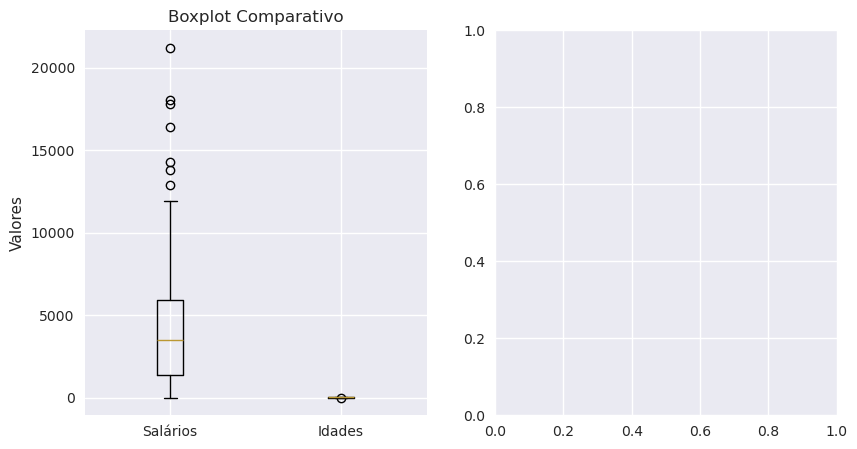

In [36]:
# Comparação visual da dispersão
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot([df['salario'], df['idade']], labels=['Salários', 'Idades'])
plt.title('Boxplot Comparativo')
plt.ylabel('Valores')

plt.subplot(1, 3, 2)

<Axes: >

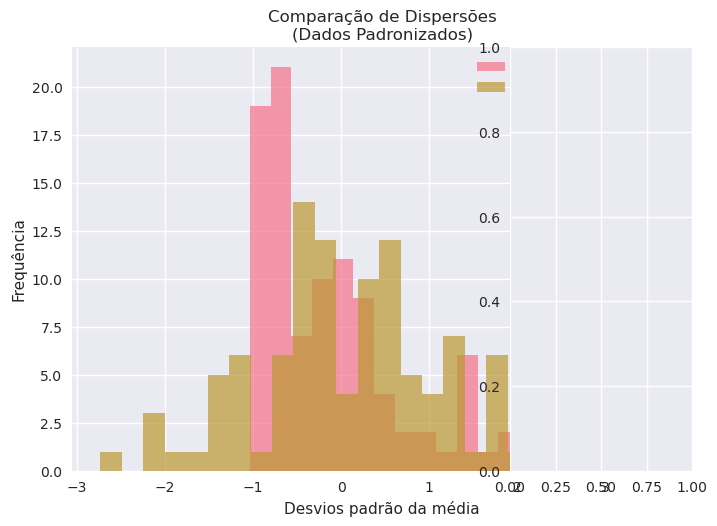

In [37]:
# Padronizando os dados para comparar dispersões
salarios_padronizados = (df['salario'] - np.mean(df['salario'])) / np.std(df['salario'])
idades_padronizadas = (df['idade'] - np.mean(df['idade'])) / np.std(df['idade'])

plt.hist(salarios_padronizados, alpha=0.7, label='Salários (padronizados)', bins=20)
plt.hist(idades_padronizadas, alpha=0.7, label='Idades (padronizadas)', bins=20)
plt.title('Comparação de Dispersões\n(Dados Padronizados)')
plt.xlabel('Desvios padrão da média')
plt.ylabel('Frequência')
plt.legend()

plt.subplot(1, 3, 3)

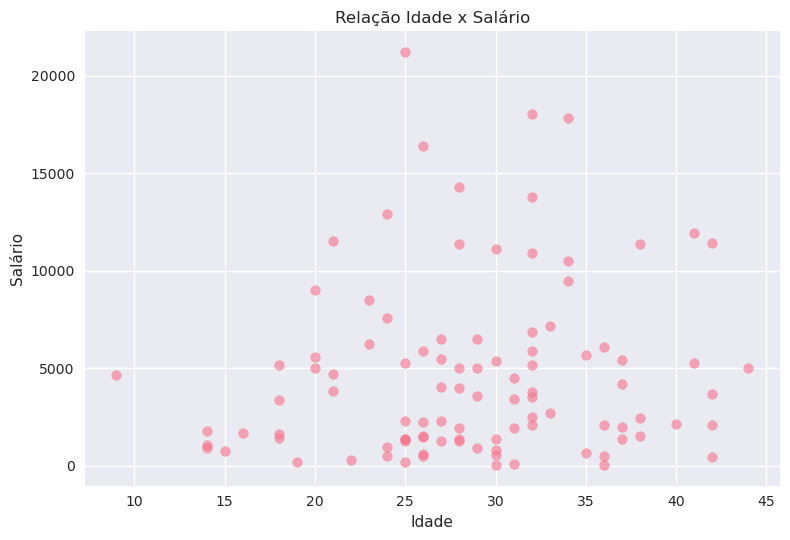

In [39]:
# Gráfico de dispersão
plt.scatter(df['idade'], df['salario'], alpha=0.6)
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.title('Relação Idade x Salário')

plt.tight_layout()
plt.show()

In [40]:
# Interpretação dos coeficientes de variação
print(f"\nINTERPRETAÇÃO DOS COEFICIENTES DE VARIAÇÃO:")
print(f"Salários: CV = {disp_salarios['cv']:.1f}%")
print(f"Idades: CV = {disp_idades['cv']:.1f}%")

if disp_salarios['cv'] > disp_idades['cv']:
    print("Os salários têm maior variabilidade relativa que as idades.")
else:
    print("As idades têm maior variabilidade relativa que os salários.")



INTERPRETAÇÃO DOS COEFICIENTES DE VARIAÇÃO:
Salários: CV = 96.3%
Idades: CV = 25.2%
Os salários têm maior variabilidade relativa que as idades.


In [43]:
## 5. Funções de Densidade e Massa de Probabilidade

print("\n\n5. FUNÇÕES DE DENSIDADE E MASSA DE PROBABILIDADE")
print("-" * 50)



5. FUNÇÕES DE DENSIDADE E MASSA DE PROBABILIDADE
--------------------------------------------------


In [44]:
# Função de Massa de Probabilidade (PMF) - Variável Discreta
print("A) FUNÇÃO DE MASSA DE PROBABILIDADE (PMF)")
print("Exemplo: Número de filhos (distribuição Poisson)")

A) FUNÇÃO DE MASSA DE PROBABILIDADE (PMF)
Exemplo: Número de filhos (distribuição Poisson)


In [45]:
# Parâmetros da distribuição Poisson
lambda_poisson = 1.5  # média de filhos por família

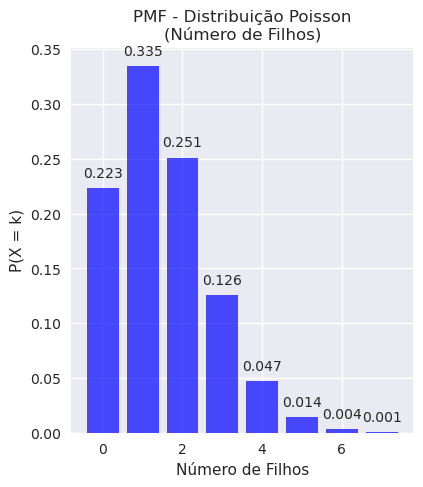

In [46]:
# Calculando PMF para diferentes valores
x_discreto = np.arange(0, 8)
pmf_values = poisson.pmf(x_discreto, lambda_poisson)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(x_discreto, pmf_values, alpha=0.7, color='blue')
plt.title('PMF - Distribuição Poisson\n(Número de Filhos)')
plt.xlabel('Número de Filhos')
plt.ylabel('P(X = k)')
for i, v in enumerate(pmf_values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

In [47]:
# Função de Densidade de Probabilidade (PDF) - Variável Contínua
print(f"\nB) FUNÇÃO DE DENSIDADE DE PROBABILIDADE (PDF)")
print("Exemplo: Alturas (distribuição Normal)")


B) FUNÇÃO DE DENSIDADE DE PROBABILIDADE (PDF)
Exemplo: Alturas (distribuição Normal)


In [48]:
# Parâmetros da distribuição Normal
mu = 170  # média da altura em cm
sigma = 10  # desvio padrão

Text(0, 0.5, 'Densidade')

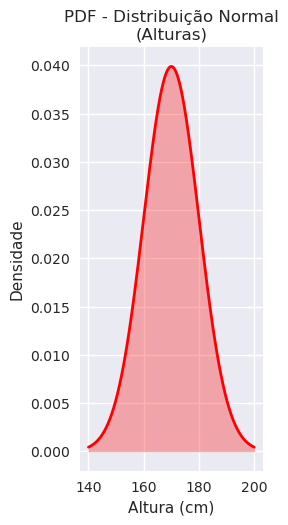

In [49]:
# Calculando PDF
x_continuo = np.linspace(140, 200, 1000)
pdf_values = norm.pdf(x_continuo, mu, sigma)

plt.subplot(1, 3, 2)
plt.plot(x_continuo, pdf_values, 'r-', linewidth=2)
plt.fill_between(x_continuo, pdf_values, alpha=0.3, color='red')
plt.title('PDF - Distribuição Normal\n(Alturas)')
plt.xlabel('Altura (cm)')
plt.ylabel('Densidade')

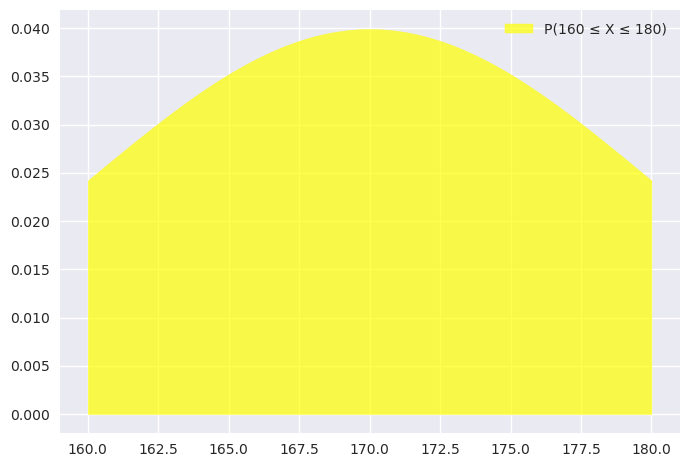

In [50]:
# Destacando área sob a curva para um intervalo
x_intervalo = x_continuo[(x_continuo >= 160) & (x_continuo <= 180)]
y_intervalo = norm.pdf(x_intervalo, mu, sigma)
plt.fill_between(x_intervalo, y_intervalo, alpha=0.7, color='yellow', 
                label='P(160 ≤ X ≤ 180)')
plt.legend()

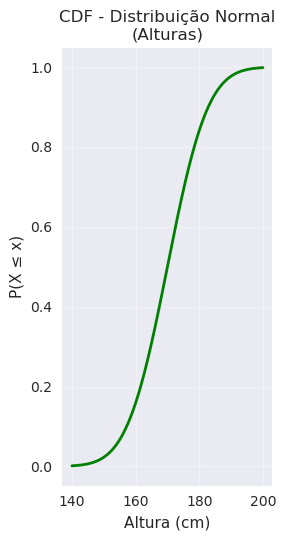

In [53]:
# Função de Distribuição Acumulada (CDF)
plt.subplot(1, 3, 3)
cdf_values = norm.cdf(x_continuo, mu, sigma)
plt.plot(x_continuo, cdf_values, 'g-', linewidth=2)
plt.title('CDF - Distribuição Normal\n(Alturas)')
plt.xlabel('Altura (cm)')
plt.ylabel('P(X ≤ x)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [54]:
# Calculando probabilidades específicas
print(f"\nCÁLCULOS DE PROBABILIDADE:")


CÁLCULOS DE PROBABILIDADE:


In [55]:
# Para Poisson (discreta)
prob_0_filhos = poisson.pmf(0, lambda_poisson)
prob_ate_2_filhos = poisson.cdf(2, lambda_poisson)
print(f"P(X = 0 filhos) = {prob_0_filhos:.4f}")
print(f"P(X ≤ 2 filhos) = {prob_ate_2_filhos:.4f}")


P(X = 0 filhos) = 0.2231
P(X ≤ 2 filhos) = 0.8088


In [56]:
# Para Normal (contínua)
prob_altura_160_180 = norm.cdf(180, mu, sigma) - norm.cdf(160, mu, sigma)
prob_altura_maior_180 = 1 - norm.cdf(180, mu, sigma)
print(f"P(160 ≤ Altura ≤ 180) = {prob_altura_160_180:.4f}")
print(f"P(Altura > 180) = {prob_altura_maior_180:.4f}")

P(160 ≤ Altura ≤ 180) = 0.6827
P(Altura > 180) = 0.1587


In [57]:
## 6. Distribuições Comuns (Normal, Binomial, Poisson)

print("\n\n6. DISTRIBUIÇÕES DE PROBABILIDADE COMUNS")
print("-" * 40)



6. DISTRIBUIÇÕES DE PROBABILIDADE COMUNS
----------------------------------------


A) DISTRIBUIÇÃO NORMAL
   Características: Simétrica, forma de sino, definida por μ e σ


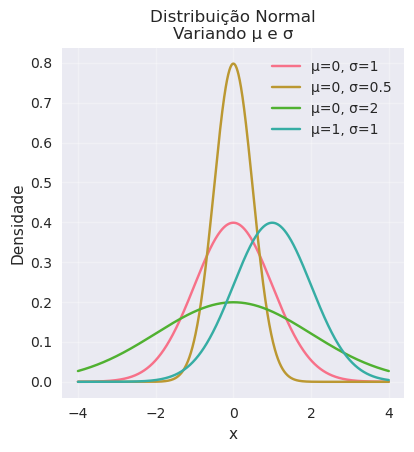

In [58]:
# A) DISTRIBUIÇÃO NORMAL
print("A) DISTRIBUIÇÃO NORMAL")
print("   Características: Simétrica, forma de sino, definida por μ e σ")

# Comparando diferentes distribuições normais
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
x = np.linspace(-4, 4, 1000)
for mu_val, sigma_val in [(0, 1), (0, 0.5), (0, 2), (1, 1)]:
    y = norm.pdf(x, mu_val, sigma_val)
    plt.plot(x, y, label=f'μ={mu_val}, σ={sigma_val}')
plt.title('Distribuição Normal\nVariando μ e σ')
plt.xlabel('x')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, alpha=0.3)


B) DISTRIBUIÇÃO BINOMIAL
   Características: n tentativas, probabilidade p de sucesso


Text(0, 0.5, 'Probabilidade')

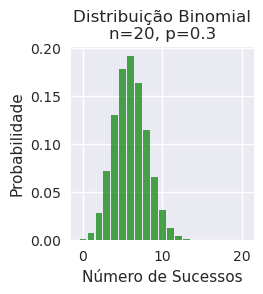

In [60]:
# B) DISTRIBUIÇÃO BINOMIAL
print(f"\nB) DISTRIBUIÇÃO BINOMIAL")
print("   Características: n tentativas, probabilidade p de sucesso")

plt.subplot(2, 3, 2)
n_trials = 20
p_success = 0.3
x_binom = np.arange(0, n_trials + 1)
y_binom = binom.pmf(x_binom, n_trials, p_success)

plt.bar(x_binom, y_binom, alpha=0.7, color='green')
plt.title(f'Distribuição Binomial\nn={n_trials}, p={p_success}')
plt.xlabel('Número de Sucessos')
plt.ylabel('Probabilidade')

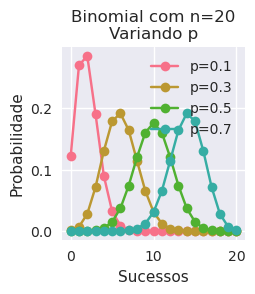

In [61]:
# Comparando diferentes valores de p
plt.subplot(2, 3, 3)
for p_val in [0.1, 0.3, 0.5, 0.7]:
    y_binom = binom.pmf(x_binom, n_trials, p_val)
    plt.plot(x_binom, y_binom, 'o-', label=f'p={p_val}')
plt.title(f'Binomial com n={n_trials}\nVariando p')
plt.xlabel('Sucessos')
plt.ylabel('Probabilidade')
plt.legend()



C) DISTRIBUIÇÃO POISSON
   Características: Eventos raros, taxa λ por unidade de tempo/espaço


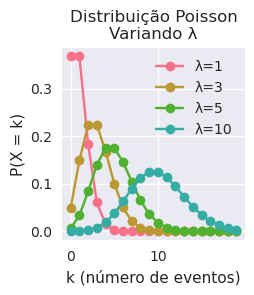

In [62]:
# C) DISTRIBUIÇÃO POISSON
print(f"\nC) DISTRIBUIÇÃO POISSON")
print("   Características: Eventos raros, taxa λ por unidade de tempo/espaço")

plt.subplot(2, 3, 4)
lambda_vals = [1, 3, 5, 10]
x_poisson = np.arange(0, 20)

for lam in lambda_vals:
    y_poisson = poisson.pmf(x_poisson, lam)
    plt.plot(x_poisson, y_poisson, 'o-', label=f'λ={lam}')
plt.title('Distribuição Poisson\nVariando λ')
plt.xlabel('k (número de eventos)')
plt.ylabel('P(X = k)')
plt.legend()

<Axes: >

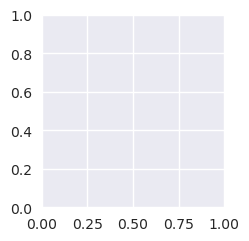

In [63]:
# Comparação das três distribuições em cenários práticos
plt.subplot(2, 3, 5)

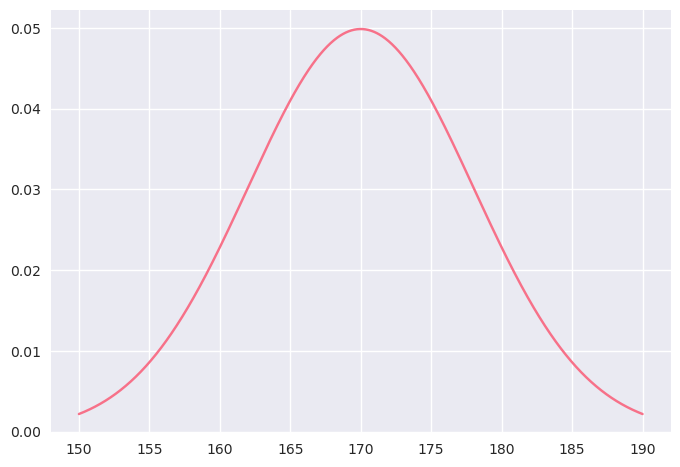

In [64]:
# Normal: alturas
x_normal = np.linspace(150, 190, 1000)
y_normal = norm.pdf(x_normal, 170, 8)
plt.plot(x_normal, y_normal, label='Normal: Alturas')

In [65]:
# Binomial: aprovações em concurso
x_binom_exemplo = np.arange(0, 51)
y_binom_exemplo = binom.pmf(x_binom_exemplo, 50, 0.2)

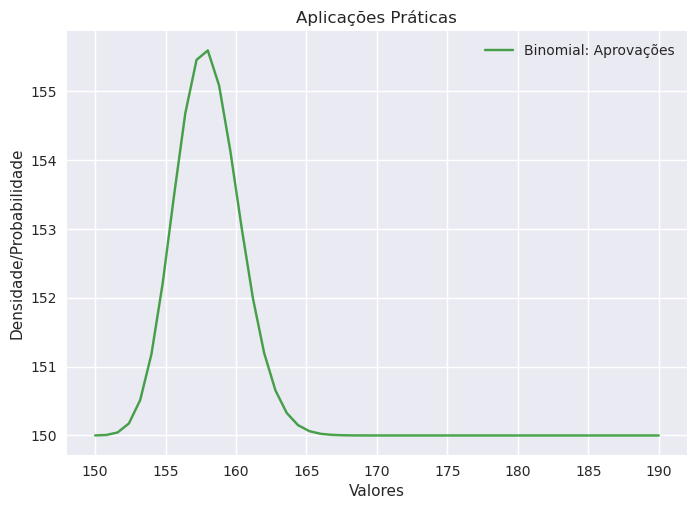

In [66]:
# Normalizando para comparar
y_binom_exemplo = y_binom_exemplo * 40 + 150  # Ajuste para visualização
plt.plot(x_binom_exemplo * 0.8 + 150, y_binom_exemplo, 'g-', alpha=0.7, label='Binomial: Aprovações')

plt.title('Aplicações Práticas')
plt.xlabel('Valores')
plt.ylabel('Densidade/Probabilidade')
plt.legend()


<Axes: >

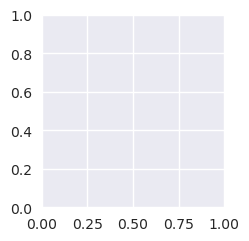

In [72]:
# Resumo estatístico das distribuições
plt.subplot(2, 3, 6)

In [73]:
# Criando dados de exemplo para cada distribuição
dados_normal = np.random.normal(170, 8, 1000)
dados_binomial = np.random.binomial(20, 0.3, 1000)
dados_poisson = np.random.poisson(3, 1000)

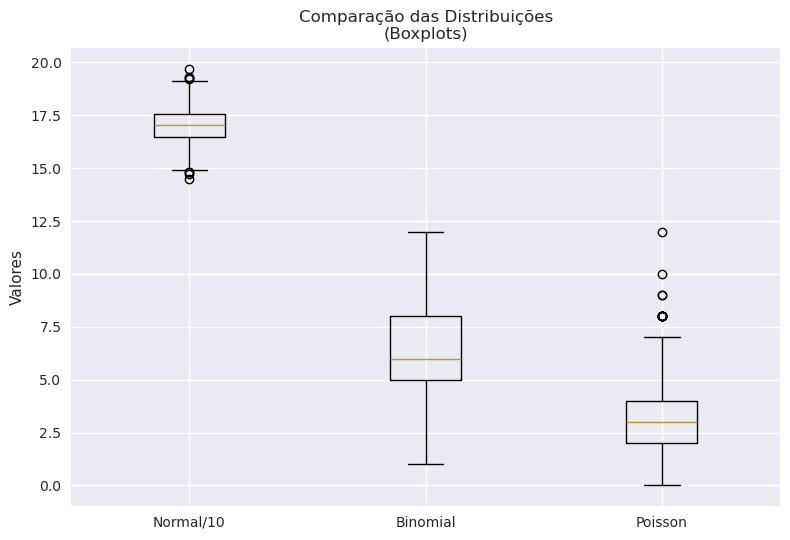

In [74]:
# Boxplot comparativo
plt.boxplot([dados_normal/10, dados_binomial, dados_poisson], 
           labels=['Normal/10', 'Binomial', 'Poisson'])
plt.title('Comparação das Distribuições\n(Boxplots)')
plt.ylabel('Valores')

plt.tight_layout()
plt.show()


In [75]:
# Calculando estatísticas para cada distribuição
print(f"\nESTATÍSTICAS DAS DISTRIBUIÇÕES:")
print(f"Normal (μ=170, σ=8):")
print(f"  Média teórica: 170, Variância teórica: 64")
print(f"  Média amostral: {np.mean(dados_normal):.2f}, Variância amostral: {np.var(dados_normal):.2f}")

print(f"\nBinomial (n=20, p=0.3):")
print(f"  Média teórica: {20*0.3}, Variância teórica: {20*0.3*0.7}")
print(f"  Média amostral: {np.mean(dados_binomial):.2f}, Variância amostral: {np.var(dados_binomial):.2f}")

print(f"\nPoisson (λ=3):")
print(f"  Média teórica: 3, Variância teórica: 3")
print(f"  Média amostral: {np.mean(dados_poisson):.2f}, Variância amostral: {np.var(dados_poisson):.2f}")



ESTATÍSTICAS DAS DISTRIBUIÇÕES:
Normal (μ=170, σ=8):
  Média teórica: 170, Variância teórica: 64
  Média amostral: 170.31, Variância amostral: 64.45

Binomial (n=20, p=0.3):
  Média teórica: 6.0, Variância teórica: 4.199999999999999
  Média amostral: 6.15, Variância amostral: 4.29

Poisson (λ=3):
  Média teórica: 3, Variância teórica: 3
  Média amostral: 3.03, Variância amostral: 3.04


In [76]:
## 7. Percentis e Momentos

print("\n\n7. PERCENTIS E MOMENTOS")
print("-" * 40)



7. PERCENTIS E MOMENTOS
----------------------------------------


In [77]:
# Usando dados de salários para demonstrar percentis
salarios = df['salario'].values

print("A) PERCENTIS")
percentis = [5, 10, 25, 50, 75, 90, 95, 99]
valores_percentis = np.percentile(salarios, percentis)

print("Percentis dos salários:")
for p, v in zip(percentis, valores_percentis):
    print(f"P{p}: R$ {v:.2f}")


A) PERCENTIS
Percentis dos salários:
P5: R$ 261.45
P10: R$ 530.66
P25: R$ 1380.61
P50: R$ 3540.38
P75: R$ 5932.54
P90: R$ 11382.17
P95: R$ 13827.41
P99: R$ 18093.13


Text(0, 0.5, 'Salário (R$)')

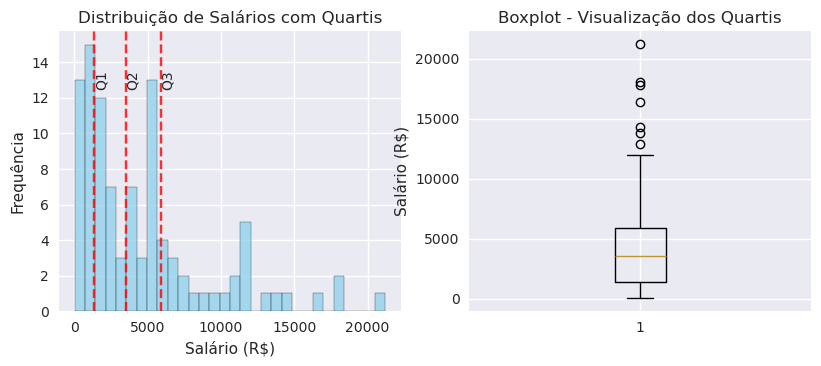

In [78]:
# Visualização dos percentis
plt.figure(figsize=(15, 8))

plt.subplot(2, 3, 1)
plt.hist(salarios, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
for p, v in zip(percentis, valores_percentis):
    if p in [25, 50, 75]:  # Quartis
        plt.axvline(v, color='red', linestyle='--', alpha=0.8)
        plt.text(v, plt.ylim()[1]*0.8, f'Q{p//25}', rotation=90)
plt.title('Distribuição de Salários com Quartis')
plt.xlabel('Salário (R$)')
plt.ylabel('Frequência')

plt.subplot(2, 3, 2)
plt.boxplot(salarios, vert=True)
plt.title('Boxplot - Visualização dos Quartis')
plt.ylabel('Salário (R$)')

In [79]:
# Mostrando os 5 valores mais importantes (five-number summary)
q0 = np.min(salarios)  # Mínimo
q1 = np.percentile(salarios, 25)  # Q1
q2 = np.percentile(salarios, 50)  # Mediana (Q2)
q3 = np.percentile(salarios, 75)  # Q3
q4 = np.max(salarios)  # Máximo

print(f"\nFIVE-NUMBER SUMMARY:")
print(f"Mínimo: R$ {q0:.2f}")
print(f"Q1 (25%): R$ {q1:.2f}")
print(f"Mediana (50%): R$ {q2:.2f}")
print(f"Q3 (75%): R$ {q3:.2f}")
print(f"Máximo: R$ {q4:.2f}")

print(f"\nB) MOMENTOS ESTATÍSTICOS")



FIVE-NUMBER SUMMARY:
Mínimo: R$ 25.37
Q1 (25%): R$ 1380.61
Mediana (50%): R$ 3540.38
Q3 (75%): R$ 5932.54
Máximo: R$ 21220.18

B) MOMENTOS ESTATÍSTICOS


In [80]:
# Momentos centrais
def calcular_momentos(dados):
    n = len(dados)
    media = np.mean(dados)
    
    # Primeiro momento (sempre 0 para momentos centrais)
    m1 = np.mean((dados - media)**1)
    
    # Segundo momento central (variância)
    m2 = np.mean((dados - media)**2)
    
    # Terceiro momento central (relacionado à assimetria)
    m3 = np.mean((dados - media)**3)
    
    # Quarto momento central (relacionado à curtose)
    m4 = np.mean((dados - media)**4)
    
    # Assimetria (skewness)
    assimetria = m3 / (m2**(3/2))
    
    # Curtose
    curtose = m4 / (m2**2)
    curtose_excesso = curtose - 3  # Curtose em excesso (0 para normal)
    
    return {
        'm1': m1, 'm2': m2, 'm3': m3, 'm4': m4,
        'assimetria': assimetria, 'curtose': curtose, 'curtose_excesso': curtose_excesso
    }

momentos_salarios = calcular_momentos(salarios)
momentos_idades = calcular_momentos(df['idade'].values)

print("Momentos para SALÁRIOS:")
print(f"  1º momento central: {momentos_salarios['m1']:.6f} (sempre ≈ 0)")
print(f"  2º momento central (variância): {momentos_salarios['m2']:.2f}")
print(f"  3º momento central: {momentos_salarios['m3']:.2f}")
print(f"  4º momento central: {momentos_salarios['m4']:.2f}")
print(f"  Assimetria: {momentos_salarios['assimetria']:.3f}")
print(f"  Curtose: {momentos_salarios['curtose']:.3f}")
print(f"  Curtose em excesso: {momentos_salarios['curtose_excesso']:.3f}")


Momentos para SALÁRIOS:
  1º momento central: 0.000000 (sempre ≈ 0)
  2º momento central (variância): 20297768.38
  3º momento central: 134291170480.16
  4º momento central: 1997574779848383.75
  Assimetria: 1.469
  Curtose: 4.848
  Curtose em excesso: 1.848


In [81]:
# Interpretação da assimetria
if abs(momentos_salarios['assimetria']) < 0.5:
    interpretacao_assim = "aproximadamente simétrica"
elif momentos_salarios['assimetria'] > 0.5:
    interpretacao_assim = "assimétrica à direita (cauda longa à direita)"
else:
    interpretacao_assim = "assimétrica à esquerda (cauda longa à esquerda)"

print(f"  Interpretação: Distribuição {interpretacao_assim}")


  Interpretação: Distribuição assimétrica à direita (cauda longa à direita)


<Axes: >

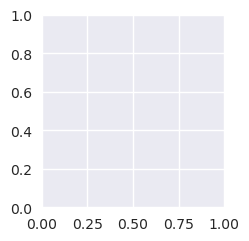

In [82]:
# Visualização da assimetria e curtose
plt.subplot(2, 3, 3)

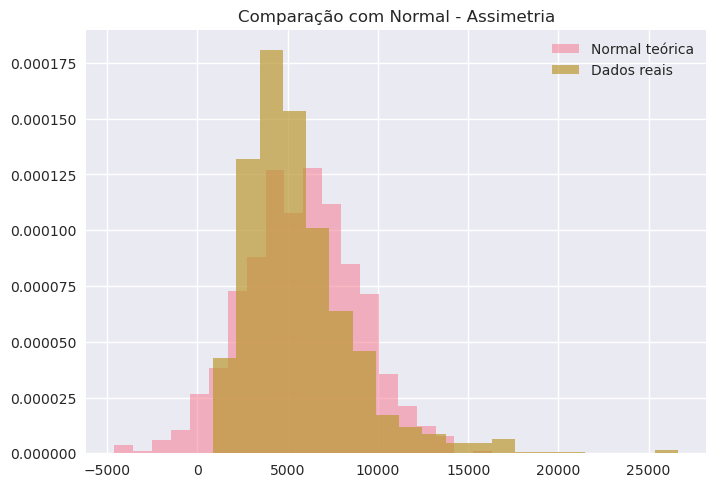

In [85]:
x_norm = np.random.normal(np.mean(salarios), np.std(salarios), len(salarios))

plt.hist(x_norm, bins=20, alpha=0.5, label='Normal teórica', density=True)
plt.hist(salarios, bins=20, alpha=0.7, label='Dados reais', density=True)
plt.title('Comparação com Normal - Assimetria')
plt.legend()
plt.show()